### 06.16

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta

pd.set_option('display.max_columns', None)


In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

In [3]:
df_click = pd.read_csv('C:/Users/mj985/section5/ecommerce_project/EDA/new_session_id.csv')
df_trans_new = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/transaction_new.csv')

In [4]:
df_click = df_click.rename(columns={'session_id': 'new_session_id'})
df_click['session_id'] = df_click['new_session_id'].apply(lambda x: x[:36])

In [5]:
# session_id 열을 기준으로 df와 df_trans_new를 병합
df_click = pd.merge(df_click, df_trans_new, on='session_id', how='left')
df_click['event_time'] = pd.to_datetime(df_click['event_time'])

In [6]:
df_click.duplicated().sum()

0

In [7]:
df_click = df_click[['new_session_id', 'event_name', 'product_id_x', 'event_time', 'traffic_source', 'payment_status_x', 'search_keywords', 'promo_code_x', 'promo_amount_x', 'customer_id']]

In [8]:
df_click.head(5)

,new_session_id,event_name,product_id_x,event_time,traffic_source,payment_status_x,search_keywords,promo_code_x,promo_amount_x,customer_id
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,NaN,2022-03-08 23:17:19.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,NaN,2022-03-08 23:17:22.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,9980.0,2022-03-08 23:17:23.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,NaN,2022-03-08 23:17:25.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,NaN,2022-03-08 23:17:32.510057+00:00,MOBILE,NaN,셔츠,NaN,NaN,25255.0


In [9]:
df_click.sort_values(['new_session_id', 'event_time'], inplace=True)

In [10]:
df_click['next_event'] = df_click.groupby('new_session_id')['event_name'].shift(-1)

In [11]:
test = df_click.drop_duplicates(subset=['new_session_id', 'event_name', 'product_id_x', 'event_time', 'traffic_source', 'payment_status_x', 'search_keywords', 'promo_code_x', 'promo_amount_x', 'customer_id'], keep='last')
test.head(5)

,new_session_id,event_name,product_id_x,event_time,traffic_source,payment_status_x,search_keywords,promo_code_x,promo_amount_x,customer_id,next_event
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,NaN,2022-03-08 23:17:19.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,CLICK
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,NaN,2022-03-08 23:17:22.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,ADD_TO_CART
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,9980.0,2022-03-08 23:17:23.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SCROLL
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,NaN,2022-03-08 23:17:25.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SEARCH
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,NaN,2022-03-08 23:17:32.510057+00:00,MOBILE,NaN,셔츠,NaN,NaN,25255.0,CLICK


In [12]:
test.head(5)
# ADD_TO_CART : 장바구니에 담기 버튼을 누르는 행위
#

,new_session_id,event_name,product_id_x,event_time,traffic_source,payment_status_x,search_keywords,promo_code_x,promo_amount_x,customer_id,next_event
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,NaN,2022-03-08 23:17:19.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,CLICK
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,NaN,2022-03-08 23:17:22.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,ADD_TO_CART
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,9980.0,2022-03-08 23:17:23.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SCROLL
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,NaN,2022-03-08 23:17:25.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SEARCH
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,NaN,2022-03-08 23:17:32.510057+00:00,MOBILE,NaN,셔츠,NaN,NaN,25255.0,CLICK


In [13]:
test['path'] = test['event_name'] + '▶' + test['next_event']

C:\Users\mj985\AppData\Local\Temp\ipykernel_18064\1455582002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['path'] = test['event_name'] + '▶' + test['next_event']


In [14]:
test['path'].value_counts()

path
ADD_TO_CART▶CLICK          117477
CLICK▶ADD_TO_CART          110150
HOMEPAGE▶ADD_TO_CART        87613
ADD_TO_CART▶ADD_TO_CART     84363
CLICK▶CLICK                 79827
                            ...  
BOOKING▶SCROLL                782
BOOKING▶ITEM_DETAIL           678
BOOKING▶SEARCH                387
BOOKING▶PROMO_PAGE            302
BOOKING▶ADD_TO_CART             1
Name: count, Length: 78, dtype: int64

In [15]:
test.shape, df_click.shape

((7990346, 12), (13167727, 11))

In [16]:
test['next_event'].value_counts()

next_event
ADD_TO_CART    489692
CLICK          427190
SCROLL         280458
HOMEPAGE       240321
ITEM_DETAIL    213103
SEARCH         202728
PROMO_PAGE      96987
ADD_PROMO       93644
BOOKING         41877
Name: count, dtype: int64

In [17]:
test['search_keywords'].value_counts(normalize=True).head(5)

search_keywords
파티 드레스    0.282434
중고        0.167937
여성 가방     0.109090
티셔츠       0.092366
옷         0.071655
Name: proportion, dtype: float64

In [18]:
test[test['next_event'].isna()]['search_keywords'].value_counts(normalize=True).head(5)

search_keywords
파티 드레스    0.276948
중고        0.168238
여성 가방     0.107173
티셔츠       0.096769
옷         0.071749
Name: proportion, dtype: float64

In [19]:
drop_click_scroll = test[(test['event_name']!='SCROLL') & (test['event_name']!='CLICK')]

In [20]:
check_next_click_scroll = test[(test['next_event'] =='SCROLL') | (test['next_event'] == 'CLICK')]

In [21]:
check_next_click_scroll.shape

(707648, 12)

In [22]:
check_next_click_scroll['event_name'].value_counts()

event_name
ADD_TO_CART    192249
CLICK          132848
HOMEPAGE        92571
SCROLL          88417
ITEM_DETAIL     65091
SEARCH          64488
ADD_PROMO       41913
PROMO_PAGE      28455
BOOKING          1616
Name: count, dtype: int64

In [23]:
# 클릭 스크롤 삭제

In [24]:
check_next_click_scroll['event_name'].value_counts(normalize=True)

event_name
ADD_TO_CART    0.271673
CLICK          0.187732
HOMEPAGE       0.130815
SCROLL         0.124945
ITEM_DETAIL    0.091982
SEARCH         0.091130
ADD_PROMO      0.059229
PROMO_PAGE     0.040211
BOOKING        0.002284
Name: proportion, dtype: float64

In [25]:
next_booking = test[(test['event_name']=='BOOKING')]['next_event'].value_counts()

In [26]:
next_booking

next_event
HOMEPAGE       2035
CLICK           834
SCROLL          782
ITEM_DETAIL     678
SEARCH          387
PROMO_PAGE      302
ADD_TO_CART       1
Name: count, dtype: int64

In [27]:
before_booking = test[(test['next_event']=='BOOKING')]['event_name'].value_counts()

In [28]:
before_booking

event_name
CLICK          10665
SCROLL          6738
ADD_TO_CART     6160
ITEM_DETAIL     5281
HOMEPAGE        4943
SEARCH          4821
PROMO_PAGE      2175
ADD_PROMO       1094
Name: count, dtype: int64

In [34]:
test

,new_session_id,event_name,product_id_x,event_time,traffic_source,payment_status_x,search_keywords,promo_code_x,promo_amount_x,customer_id,next_event,path
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,NaN,2022-03-08 23:17:19.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,CLICK,HOMEPAGE▶CLICK
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,NaN,2022-03-08 23:17:22.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,ADD_TO_CART,CLICK▶ADD_TO_CART
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,9980.0,2022-03-08 23:17:23.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SCROLL,ADD_TO_CART▶SCROLL
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,NaN,2022-03-08 23:17:25.510057+00:00,MOBILE,NaN,NaN,NaN,NaN,25255.0,SEARCH,SCROLL▶SEARCH
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,NaN,2022-03-08 23:17:32.510057+00:00,MOBILE,NaN,셔츠,NaN,NaN,25255.0,CLICK,SEARCH▶CLICK
...,...,...,...,...,...,...,...,...,...,...,...,...
13167722,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353946,ITEM_DETAIL,NaN,2021-02-25 20:37:22.937313+00:00,MOBILE,NaN,NaN,NaN,NaN,2353.0,NaN,NaN
13167723,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353947,SEARCH,NaN,2021-02-25 23:57:56.937313+00:00,MOBILE,NaN,옷,NaN,NaN,2353.0,NaN,NaN
13167724,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353948,ADD_TO_CART,42693.0,2021-02-26 03:20:58.937313+00:00,MOBILE,NaN,NaN,NaN,NaN,2353.0,NaN,NaN
13167725,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353949,ADD_TO_CART,20603.0,2021-02-26 06:42:58.937313+00:00,MOBILE,NaN,NaN,NaN,NaN,2353.0,NaN,NaN


### 06.19 추가 진행

In [35]:
df_BOOKING = test.groupby('new_session_id').filter(lambda x: 'BOOKING' in x['event_name'].values)

In [42]:
df_no_BOOKING = test.groupby('new_session_id').filter(lambda x: 'BOOKING' not in x['event_name'].values)

In [41]:
df_BOOKING.groupby('new_session_id')['event_time'].count()

new_session_id
00005746-17ec-449c-9c5c-699a3ea9304a_1          66
00007415-e0e7-4a33-95e8-5bc749016876_1          54
00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd_3           1
0000a729-3de3-4613-9022-d12b7fa06e75_6           1
0000b1a6-8dca-4fb3-b1db-ccde1791a330_28          1
                                                ..
ffff9ec9-7da3-4061-a02f-6e5d1b9271e9_5353870     1
ffffce53-1ba7-4d7d-a14a-ffa7079cfbff_5353885     1
ffffd3d9-79db-459e-a427-388204a7aac7_5353900     1
ffffdf8e-dea1-42bc-9839-7662675c0d38_5353938     1
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353950     1
Name: event_time, Length: 531232, dtype: int64

In [50]:
print('전체 세션 페이지뷰(1개짜리 제외)',round(test.groupby('new_session_id')['event_time'].count().loc[lambda x: x != 1].mean(),2))

전체 세션 페이지뷰(1개짜리 제외) 3.52


In [53]:
test.groupby('new_session_id')['event_time'].count().loc[lambda x: x != 1].describe()

count    826190.000000
mean          3.524843
std           6.979886
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         470.000000
Name: event_time, dtype: float64

In [51]:
print('예약이 존재하는 세션(1개짜리 제외)',round(df_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].mean(),2))

예약이 존재하는 세션(1개짜리 제외) 17.69


In [54]:
df_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].describe()

count    46068.000000
mean        17.687245
std         18.223204
min          2.000000
25%          7.000000
50%         12.000000
75%         22.000000
max        470.000000
Name: event_name, dtype: float64

In [52]:
print('예약이 존재하지 않는 세션(1개짜리 제외)',round(df_no_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].mean(),2))

예약이 존재하지 않는 세션(1개짜리 제외) 2.69


In [55]:
df_no_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].describe()

count    780122.000000
mean          2.688521
std           4.409307
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         197.000000
Name: event_name, dtype: float64

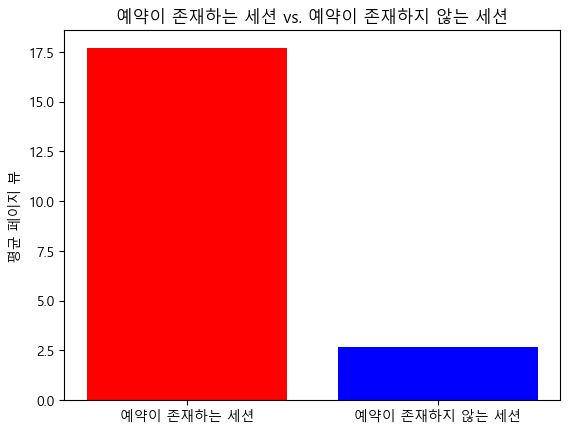

In [47]:
# 예약이 존재하는 세션(1개짜리 제외)의 평균 이벤트 수
booking_mean = df_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].mean()

# 예약이 존재하지 않는 세션(1개짜리 제외)의 평균 이벤트 수
no_booking_mean = df_no_BOOKING.groupby('new_session_id')['event_name'].count().loc[lambda x: x != 1].mean()

# 그래프 그리기
fig, ax = plt.subplots()
ax.bar(['예약이 존재하는 세션', '예약이 존재하지 않는 세션'], [booking_mean, no_booking_mean], color=['red', 'blue'])
ax.set_ylabel('평균 페이지 뷰')
ax.set_title('예약이 존재하는 세션 vs. 예약이 존재하지 않는 세션')
plt.show()

In [48]:
df_BOOKING['event_name'].value_counts()

event_name
BOOKING        531232
CLICK          173611
HOMEPAGE       162773
SCROLL         117028
ITEM_DETAIL     91853
ADD_TO_CART     89000
SEARCH          83633
PROMO_PAGE      38613
ADD_PROMO       12237
Name: count, dtype: int64

In [ ]:
df_BOOKING